In [1]:
import numpy as np
from scipy import stats
import math
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

load_iris()


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
X = pd.read_csv("iris.csv")
X.tail(10)

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_length.1,labels
140,140,6.7,3.1,5.6,2.4,virginica
141,141,6.9,3.1,5.1,2.3,virginica
142,142,5.8,2.7,5.1,1.9,virginica
143,143,6.8,3.2,5.9,2.3,virginica
144,144,6.7,3.3,5.7,2.5,virginica
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica
149,149,5.9,3.0,5.1,1.8,virginica


Probabilidad de petal lengrh = 3.5 :[0.07457627 0.         0.33898305]


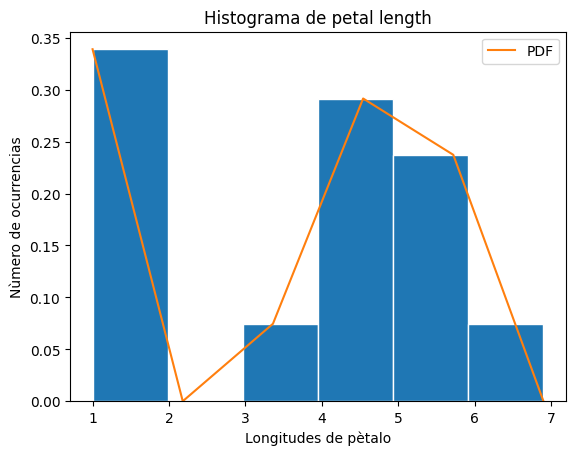

In [3]:
petal_length = X["petal_length"]
min_length, max_length = min (petal_length), max(petal_length)
n_bins=math.ceil((max_length - min_length)/1)
hist = np.histogram(petal_length, bins=n_bins)
hist_dist= stats.rv_histogram(histogram=hist,density=True)


plt.hist(petal_length,bins=n_bins,edgecolor="white",density=True)

# Crea la linea que cruza las barras
eje_x= np.linspace(min_length,max_length, n_bins)
plt.plot(eje_x,hist_dist.pdf(eje_x),label="PDF")

plt.title("Histograma de petal length")
plt.xlabel("Longitudes de pètalo")
plt.ylabel("Nùmero de ocurrencias")
plt.legend()

plt.show
print(f"Probabilidad de petal lengrh = 3.5 :{hist_dist.pdf([3.5,2,1])}")



[50.  0. 11. 43. 35. 11.]
[1.         1.98333333 2.96666667 3.95       4.93333333 5.91666667
 6.9       ]
Rectangle(xy=(1, 0), width=0.983333, height=50, angle=0)


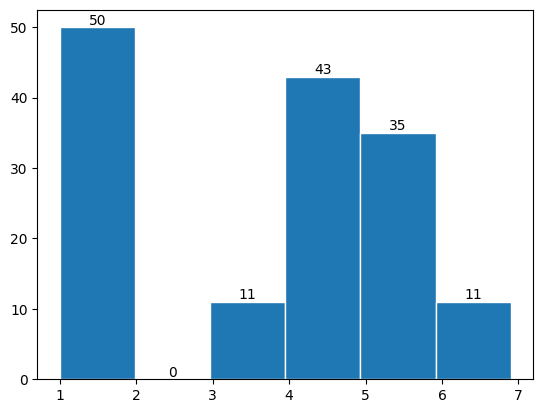

In [4]:
counts,edges, bars =plt.hist(petal_length,bins=6, edgecolor="white")

#Valores del histograma
print (counts)
print (edges)
print (bars[0])

plt.bar_label(bars)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

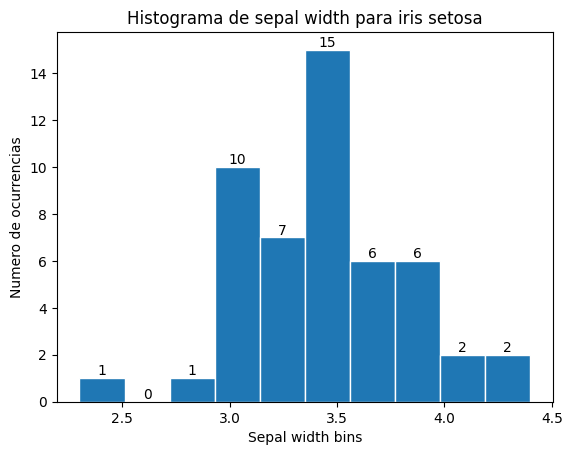

In [5]:
especie = "setosa"
feature = "sepal_width"

setosa_sepal_width= X[X["labels"] == especie]["sepal_width"]
_,_,bars = plt.hist(setosa_sepal_width,bins=10,edgecolor="white")
plt.bar_label(bars)
plt.title("Histograma de sepal width para iris setosa")
plt.xlabel("Sepal width bins")
plt.ylabel("Numero de ocurrencias")
plt.show

n_spacies=3


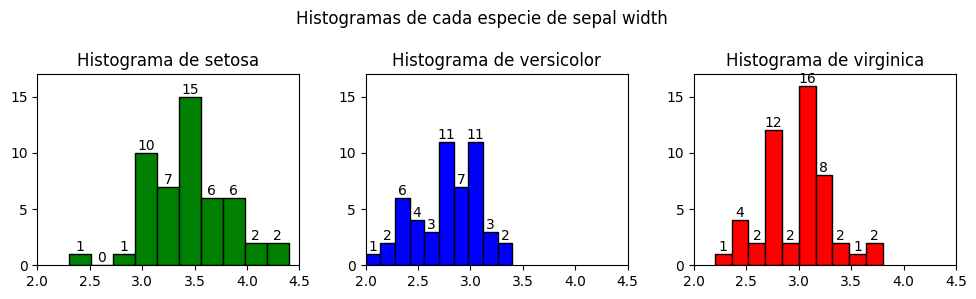

In [6]:
n_spacies=len(X["labels"].unique())

fig, ax = plt.subplots(
    figsize = (10,3),
    nrows = 1,
    ncols = n_spacies
)

print (f"{n_spacies=}")
plt.suptitle("Histogramas de cada especie de sepal width")
current_ax= 1
colors = ["green","blue","red"]
especies = X["labels"].unique()
feature_name = "sepal_width"

for especie in especies:
    plt.subplot(1 , 3 , current_ax)
    feature = X[X["labels"] == especie][feature_name]
    _,_,bars = plt.hist(
        feature,
        label = feature_name,
        color = colors[current_ax - 1],
        linewidth= 1,
        edgecolor= "black"
    )
    plt.title(f"Histograma de {especie}")
    plt.bar_label(bars)
    current_ax +=1
    plt.xlim(2,4.5)
    plt.ylim(0,17)
plt.tight_layout()


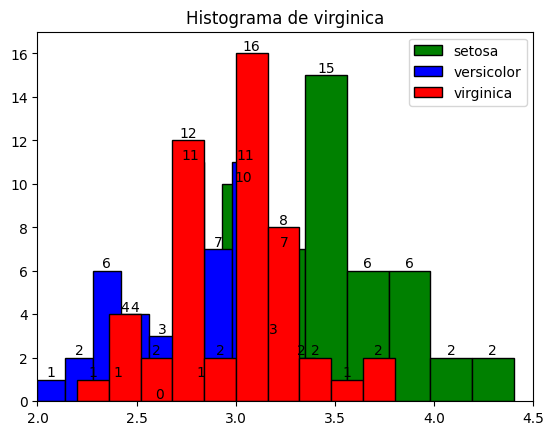

In [7]:
current_ax = 1
for especie in especies:
#    plt.subplot(1 , 3 , current_ax)
    feature = X[X["labels"] == especie][feature_name]
    _,_,bars = plt.hist(
        feature,
        label = especie,
        color = colors[current_ax - 1],
        linewidth= 1,
        edgecolor= "black"
    )
    plt.title(f"Histograma de {especie}")
    plt.bar_label(bars)
    current_ax +=1
    plt.xlim(2,4.5)
    plt.ylim(0,17)
    plt.legend()